In this notebook, we will slowly work through the basics of PyTorch using the MNIST dataset. Each block of code is followed by some questions(Q) or tasks(T) , which will help the reader understand the content better.

## Data

### Directory Setup
First, we'll create a directory where we'll download and extract the data.

In [3]:
from pathlib import Path

DATA_PATH = Path('../data')
PATH = DATA_PATH/'mnist'

PATH.mkdir(parents=True, exist_ok=True)

**Q**: What is a good strategy for keeping all your datasets in a common location (here we are using a local folder)?


**T**: Demonstrate the power of [pathlib](https://docs.python.org/3/library/pathlib.html) using a Jupyter notebook.

Now, let us download the data and write it to disk

In [9]:
import requests

URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'

if not (PATH/FILENAME).exists():
    content = requests.get(URL+FILENAME).content
    (PATH/FILENAME).open('wb').write(content)

**Q**: How can we show the size of the file and a progres bar for the download? Right now it gives very little information. We won't know if something went wrong.


**Q**: How can for corruption in the downloaded file? *Hint*: md5 hash 


**Q**: Notice that we are first downloading the data to memory (into the variable `content`), and then writing it to a file. This approach won't work for large datasets (e.g. 20 GB). Can you find a better way to do this? *Hint*: Look at the [`get_file`](https://github.com/keras-team/keras/blob/master/keras/utils/data_utils.py#L123) function in Keras.

### Data Download

In [10]:
import pickle, gzip

with gzip.open(PATH/FILENAME, 'rb') as f:
    data = pickle.load(f, encoding='latin-1')
    ((x_train, y_train), (x_valid, y_valid), _) = data

**T**: Explore the [`pickle`](https://docs.python.org/2/library/pickle.html) module and create a notebook to demonstrate common tasks.

**Q**: How would you deal with a `.zip` or `.tar.gz` file? Might it be a better idea to uncompress the data in the previous step itself?

In [11]:
x_train.shape

(50000, 784)

The training data has 50,000 images. Each image is 28x28, and is stored as a flattened row of length 784 (28x28)

### Looking at the data

We can use `matplotlib` and `numpy` to look at an image from the dataset.

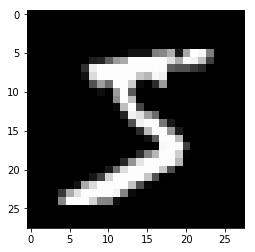

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.reshape(x_train[0], (28, 28)), cmap='gray');

**Q**: What does `%matplotlib inline` do? *Hint*: [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

**Q**: How can we display multiple images in a grid, instead of just 1? How can we pick a random sample from the dataset to display? *Hint*: See below

**T**: Write a generic helper function that can be used to display images in a grid from any dataset.

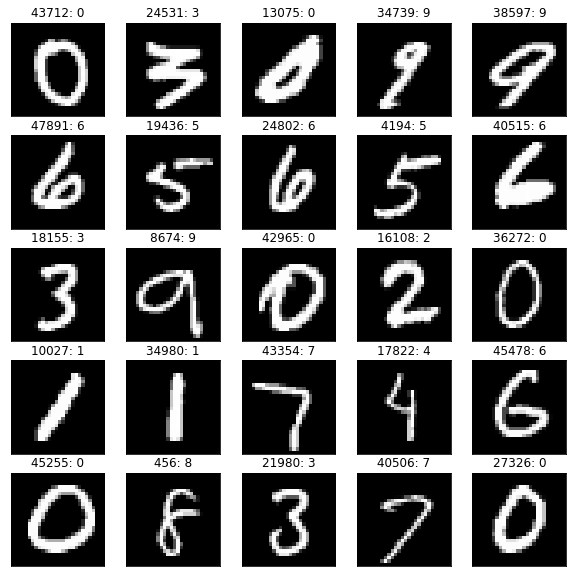

In [31]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
idxs = np.random.randint(x_train.shape[0], size=25)

for i,ax in enumerate(axes.flat):
    ax.imshow(x_train[idxs[i]].reshape((28, 28)), cmap='gray')
    ax.set_title(f'{idxs[i]}: {y_train[idxs[i]]}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)